In [10]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import matplotlib
import gsw
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)

In [3]:
dataroot = '/home/ashao/dev/GFDL/MOM6_cases/neutral_diffusion/'
cases = ['teos10_layer','teos10_full','teos10_int_drho','teos10_linear','teos10_neutral']
levels = [5] + list(range(10,201,10))
print(levels)
# cases = ['teos10_layer','teos10_linear']
output = {key:{} for key in cases}
names = []
for case in cases:
    for lev in levels:
        name = f'{case}_nk{lev}'
        names.append(name)
        output[name] = {}
        print(name)
        output[name]['initial'] = xr.open_dataset(f'{dataroot}/{case}/nk{lev}/Initial_state.nc').isel({'Time':0,'lath':0})
        output[name]['out_nat'] = xr.open_dataset(f'{dataroot}/{case}/nk{lev}/prog.nc').isel({'yh':0})
        output[name]['out_z'] = xr.open_dataset(f'{dataroot}/{case}/nk{lev}/prog_z.nc').isel({'yh':0})

[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
teos10_layer_nk5
teos10_layer_nk10
teos10_layer_nk20
teos10_layer_nk30


/home/ashao/miniconda3/lib/python3.7/site-packages/xarray/coding/times.py:211: FutureWarning: the 'box' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'box'
  result = pd.to_timedelta(num_timedeltas, unit=units, box=False)


teos10_layer_nk40
teos10_layer_nk50
teos10_layer_nk60
teos10_layer_nk70
teos10_layer_nk80
teos10_layer_nk90
teos10_layer_nk100
teos10_layer_nk110
teos10_layer_nk120
teos10_layer_nk130
teos10_layer_nk140
teos10_layer_nk150
teos10_layer_nk160
teos10_layer_nk170
teos10_layer_nk180
teos10_layer_nk190
teos10_layer_nk200
teos10_full_nk5
teos10_full_nk10
teos10_full_nk20
teos10_full_nk30
teos10_full_nk40
teos10_full_nk50
teos10_full_nk60
teos10_full_nk70
teos10_full_nk80
teos10_full_nk90
teos10_full_nk100
teos10_full_nk110
teos10_full_nk120
teos10_full_nk130
teos10_full_nk140
teos10_full_nk150
teos10_full_nk160
teos10_full_nk170
teos10_full_nk180
teos10_full_nk190
teos10_full_nk200
teos10_int_drho_nk5
teos10_int_drho_nk10
teos10_int_drho_nk20
teos10_int_drho_nk30
teos10_int_drho_nk40
teos10_int_drho_nk50
teos10_int_drho_nk60
teos10_int_drho_nk70
teos10_int_drho_nk80
teos10_int_drho_nk90
teos10_int_drho_nk100
teos10_int_drho_nk110
teos10_int_drho_nk120
teos10_int_drho_nk130
teos10_int_drho_nk1

In [21]:
data = output['teos10_layer_nk100']['initial']
z = -(data['h'].cumsum('Layer') - 0.5*data['h'])
x = np.tile(data['lonh'],(len(z),1))

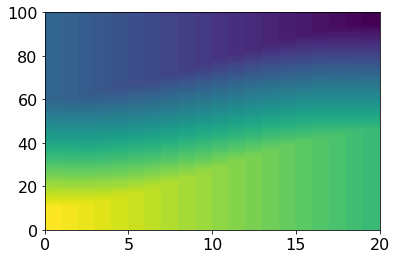

In [26]:
data = output['teos10_layer_nk100']['out_nat']
tidx = 1
z = -(data['e'][tidx,:-1,:].values - 0.5*data['h'][tidx,:,:])
x = np.tile(data['xh'],(len(z),1))

plt.pcolormesh(data['temp'][tidx])

# plt.pcolormesh(x,z,data['rhopot2'][tidx,:,:])

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


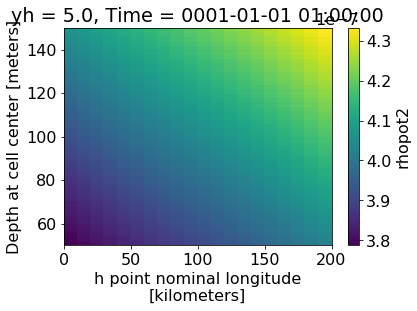

In [27]:
layer = output['teos10_layer_nk100']['out_z']
neutral = output['teos10_linear_nk100']['out_z']
var = 'rhopot2'
zsub = range(25,75)
(layer[var][0,zsub,:]-neutral[var][0,zsub,:]).plot()

Reference diffusion:  <xarray.DataArray ()>
array(1.395106e-06)
Coordinates:
    yh       float64 5.0
    Time     object 0001-01-01 01:00:00


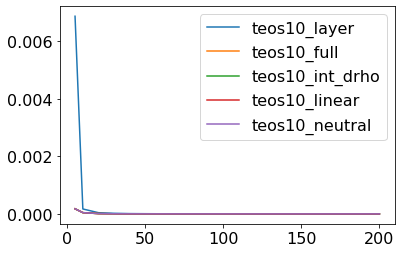

In [94]:
dz = 2
dt = 3600
g=9.81
gamma=0.2
N2 = 7.7e-5
area = 1.e5*1.e5
subz = range(25,75)
zprime = (output['teos10_layer_nk200']['out_z']['z_l'][subz])[::-1]
reference = output['teos10_layer_nk200']['out_z']['rhopot2'][0,subz,:]

reference_diff = (g*(output['teos10_layer_nk200']['out_z']['rhopot2'][1,subz,:]-output['teos10_layer_nk200']['out_z']['rhopot2'][0,subz,:])*zprime*dz).sum('z_l')
reference_diff = reference_diff / (dt * (output['teos10_layer_nk200']['out_z']['rhopot2'][0,subz,:]*dz).sum('z_l') *N2)
print('Reference diffusion: ',reference_diff.mean('xh'))

diff = {}
for case in cases:
    diff[case] = np.zeros(len(levels))    
    for zidx, lev in enumerate(levels):        
        name = f'{case}_nk{lev}'
        diff_rho = output[name]['out_z']['rhopot2'][0,subz,:]-reference
        APE = (g*diff_rho*output[name]['out_z']['z_l'][subz][::-1]*dz)
        diff[case][zidx] = (APE.sum('z_l')/(N2*output[name]['out_z']['rhopot2'][1,subz,:].sum('z_l')*2*dt)).mean('xh')
        
#         diff[case][zidx]= 
#         diff[case][zidx] = np.abs(APE.sum('z_l').mean('xh')/3600*gamma)
        
plt.figure()
for case in cases:
    plt.plot(levels,(diff[case]),label=case)
plt.legend()

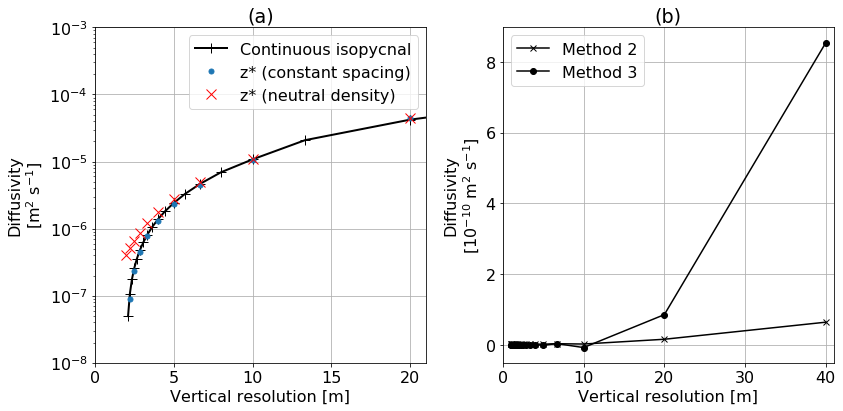

In [96]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
dzrho = 400/np.array(levels)
dz = 200/np.array(levels)
plt.semilogy(dzrho[1:-1],(diff['teos10_layer'])[1:-1],'k-+',label='Continuous isopycnal',linewidth=2,markersize=10)
plt.semilogy(dz[:11],(diff['teos10_full'])[:11],'o',label='z* (constant spacing)',linewidth=0.1,markersize=5)
plt.semilogy(dz[:11],(diff['teos10_neutral'])[:11],'rx',label='z* (neutral density)',markersize=10)
plt.xlim([0,21])
plt.ylim([1e-8,1e-3])
plt.xlabel('Vertical resolution [m]')
plt.ylabel('Diffusivity\n' + r'[m$^2$ s$^{-1}$]')
plt.grid()
plt.legend()
plt.title('(a)')

plt.subplot(1,2,2)
markers=['x','o']
labels = { 'teos10_linear':'Method 2', 'teos10_int_drho':r'Method 3'}
for idx, case in enumerate(labels.keys()):
    if ('layer' not in case) and ('full' not in case) and ('neutral' not in case):
        plt.plot(dz,(diff[case]-diff['teos10_full'])*1e10,label=labels[case],color='black',marker=markers[idx])
plt.legend()
plt.xlim((0,41))
plt.xlabel('Vertical resolution [m]')
plt.ylabel('Diffusivity\n'+r'[10$^{-10}$ m$^2$ s$^{-1}$]')
plt.grid()
plt.title('(b)')
plt.tight_layout()

In [86]:
idx

2

In [22]:
dz

array([40.        , 20.        , 10.        ,  6.66666667,  5.        ,
        4.        ,  3.33333333,  2.85714286,  2.5       ,  2.22222222,
        2.        ,  1.81818182,  1.66666667,  1.53846154,  1.42857143,
        1.33333333,  1.25      ,  1.17647059,  1.11111111,  1.05263158,
        1.        ])

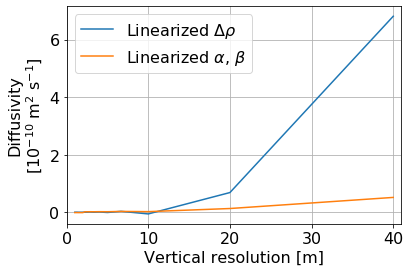

In [56]:
plt.figure()
labels = { 'teos10_linear':r'Linearized $\alpha$, $\beta$', 'teos10_int_drho':r'Linearized $\Delta\rho$' }
for case in diff.keys():
    if ('layer' not in case) and ('full' not in case):
        plt.plot(dz,(diff[case]-diff['teos10_full'])*1e10,label=labels[case])
plt.legend()
plt.xlim((0,41))
plt.xlabel('Vertical resolution [m]')
plt.ylabel('Diffusivity\n'+r'[10$^{-10}$ m$^2$ s$^{-1}$]')
plt.grid()

In [24]:
popt_int, pcov = curve_fit(lambda dz,a,b,c: a*np.exp(b*dz)+c, dz,1e10*(diff['teos10_int_drho']-diff['teos10_full']))
popt_lin, pcov = curve_fit(lambda dz,a,b,c: a*np.exp(b*dz)+c, dz[:5],1e10*(diff['teos10_linear']-diff['teos10_full'])[:5])

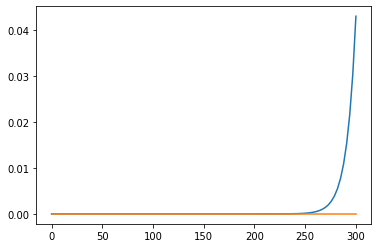

In [12]:
dz_int = np.linspace(0,300,100)
plt.plot(dz_int,(popt_int[0]*np.exp(popt_int[1]*dz_int)+popt_int[2])*1e-10*1e-5)
plt.plot(dz_int,(popt_lin[0]*np.exp(popt_lin[1]*dz_int)+popt_lin[2])*1e-10*1e-5)
# plt.scatter(dz,1e10*(diff['teos10_int_drho']-diff['teos10_full']))

(50, 150)

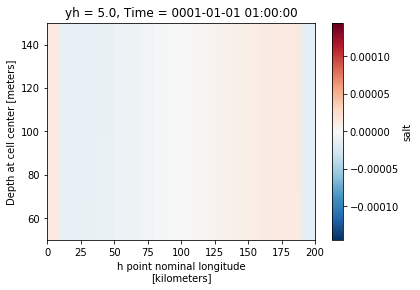

In [41]:
(output['teos10_neutral_nk200']['out_z'].salt[0,:,:]-output['teos10_full_nk200']['out_z'].salt[0,:,:]).plot()
plt.ylim(50,150)

In [13]:
output['teos10_full_nk50']['out_z']

<xarray.Dataset>
Dimensions:    (Time: 24, xh: 20, xq: 20, yq: 4, z_i: 101, z_l: 100)
Coordinates:
  * xq         (xq) float64 10.0 20.0 30.0 40.0 50.0 ... 170.0 180.0 190.0 200.0
    yh         float64 5.0
  * z_l        (z_l) float64 1.0 3.0 5.0 7.0 9.0 ... 193.0 195.0 197.0 199.0
  * z_i        (z_i) float64 0.0 2.0 4.0 6.0 8.0 ... 194.0 196.0 198.0 200.0
  * Time       (Time) object 0001-01-01 01:00:00 ... 0001-01-02 00:00:00
  * xh         (xh) float64 5.0 15.0 25.0 35.0 45.0 ... 165.0 175.0 185.0 195.0
  * yq         (yq) float64 10.0 20.0 30.0 40.0
Data variables:
    u          (Time, z_l, xq) float32 ...
    v          (Time, z_l, yq, xh) float32 ...
    h          (Time, z_l, xh) float64 ...
    e          (Time, z_i, xh) float64 ...
    temp       (Time, z_l, xh) float64 ...
    salt       (Time, z_l, xh) float64 ...
    rhoinsitu  (Time, z_l, xh) float64 ...
    rhopot0    (Time, z_l, xh) float64 ...
    rhopot2    (Time, z_l, xh) float64 ...
    dye001     (Time, z_l, xh) 

In [65]:
data = output['teos10_full_nk20']['out_z']
dz = 1.
dt = 3600.
g = 9.81
N2 = 7.7e-5
diff_rho = data['rhopot2'][1,:,0]-data['rhopot2'][0,:,0]
g * (diff_rho/dt*data['z_l'][::-1]*2).sum('z_l')/(2*data['rhopot2'][0,:,1]*N2)


<xarray.DataArray (z_l: 100)>
array([8.068689e-06, 8.068689e-06, 8.068689e-06, 8.068689e-06, 8.068689e-06,
       8.068500e-06, 8.068437e-06, 8.068374e-06, 8.068311e-06, 8.068248e-06,
       8.068186e-06, 8.068123e-06, 8.068060e-06, 8.067997e-06, 8.067934e-06,
       8.067871e-06, 8.067809e-06, 8.067746e-06, 8.067683e-06, 8.067621e-06,
       8.067558e-06, 8.067495e-06, 8.067433e-06, 8.067370e-06, 8.067308e-06,
       8.067245e-06, 8.067183e-06, 8.067120e-06, 8.067058e-06, 8.066995e-06,
       8.066933e-06, 8.066870e-06, 8.066808e-06, 8.066746e-06, 8.066683e-06,
       8.066621e-06, 8.066559e-06, 8.066497e-06, 8.066434e-06, 8.066372e-06,
       8.066310e-06, 8.066248e-06, 8.066186e-06, 8.066124e-06, 8.066062e-06,
       8.066000e-06, 8.065938e-06, 8.065876e-06, 8.065814e-06, 8.065752e-06,
       8.065690e-06, 8.065628e-06, 8.065566e-06, 8.065504e-06, 8.065443e-06,
       8.065381e-06, 8.065319e-06, 8.065257e-06, 8.065196e-06, 8.065134e-06,
       8.065072e-06, 8.065011e-06, 8.064949e-0

In [66]:
data['rhopot0']

<xarray.DataArray 'rhopot0' (Time: 24, z_l: 100, xh: 20)>
array([[[1026.375035, 1026.388486, ..., 1026.908899, 1026.921968],
        [1026.375035, 1026.388486, ..., 1026.908899, 1026.921968],
        ...,
        [1027.056042, 1027.068603, ..., 1027.575641, 1027.587804],
        [1027.056042, 1027.068603, ..., 1027.575641, 1027.587804]],

       [[1026.375024, 1026.388504, ..., 1026.908888, 1026.921987],
        [1026.375024, 1026.388504, ..., 1026.908888, 1026.921987],
        ...,
        [1027.056022, 1027.068615, ..., 1027.575621, 1027.587818],
        [1027.056022, 1027.068615, ..., 1027.575621, 1027.587818]],

       ...,

       [[1026.37489 , 1026.388668, ..., 1026.908714, 1026.922194],
        [1026.37489 , 1026.388668, ..., 1026.908714, 1026.922194],
        ...,
        [1027.055804, 1027.0688  , ..., 1027.575434, 1027.587975],
        [1027.055804, 1027.0688  , ..., 1027.575434, 1027.587975]],

       [[1026.374886, 1026.388671, ..., 1026.908706, 1026.922198],
        [1026

In [53]:
N2

array([ 0.00000000e+00, -1.16295414e-04, -7.51841842e-05, -7.41059854e-05,
       -7.38285482e-05, -7.40996763e-05, -7.57642453e-05, -7.73481580e-05,
       -7.72165853e-05, -7.67782130e-05, -7.68278803e-05, -7.69658847e-05,
       -7.69692635e-05, -7.69446468e-05, -7.69426536e-05, -7.69453373e-05,
       -7.69441020e-05, -7.69420980e-05, -7.69409316e-05, -7.69399208e-05,
       -7.69386891e-05, -7.69374194e-05, -7.69362125e-05, -7.69350194e-05,
       -7.69338132e-05, -7.69326069e-05, -7.69314079e-05, -7.69302125e-05,
       -7.69290190e-05, -7.69278283e-05, -7.69266408e-05, -7.69254565e-05,
       -7.69242750e-05, -7.69230966e-05, -7.69219212e-05, -7.69207489e-05,
       -7.69195797e-05, -7.69184135e-05, -7.69172505e-05, -7.69160906e-05,
       -7.69149339e-05, -7.69137803e-05, -7.69126299e-05, -7.69114826e-05,
       -7.69103386e-05, -7.69091978e-05, -7.69080603e-05, -7.69069260e-05,
       -7.69057950e-05, -7.69046672e-05, -7.69035428e-05, -7.69024217e-05,
       -7.69013039e-05, -

In [51]:
N2

-7.7e-05